## Appendix A1

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_image(path):
    im = cv2.imread(path, 0)
    (h, w) = im.shape[:2]
    max_res = 200

    if h > w:
        r = max_res / float(h)
        dim = (int(w * r), max_res)
    else:
        r = max_res / float(w)
        dim = (max_res, int(h * r))
    
    

    im = cv2.resize(im, dim, interpolation=cv2.INTER_AREA)
    im_uint8 = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) * 255)).astype('uint8')
    
    return im_uint8

#### Probalility Density and Cumulative Density Functions

In [9]:
def create_pdf(im_in):
    pdf = np.zeros(256)
    for freq in im_in.ravel():
        pdf[freq] += 1
    pdf = pdf / len(im_in.ravel())
    return pdf

In [10]:
def create_cdf(pdf):
    cdf = np.zeros(256)
    total = 0
    for i, prob in enumerate(pdf):
        total += prob
        cdf[i] = total
    return cdf

In [14]:
def histogram_equalization(im_in):
    image_length = len(im_in.ravel())
    pdf = create_pdf(im_in) # Your previously implemented function
    cdf = create_cdf(pdf) # Your previously implemented function
    # Create a histogram equalized image using your computed cdf
    equalized_im = np.zeros(image_length)
    for i, pixel_value in enumerate(im_in.ravel()):
        equalized_im[i] = int(cdf[pixel_value] * 255)
    equalized_im = np.reshape(equalized_im, im_in.shape)
    equalized_im = equalized_im.astype(int)
    return equalized_im

#### Histogram Equilization

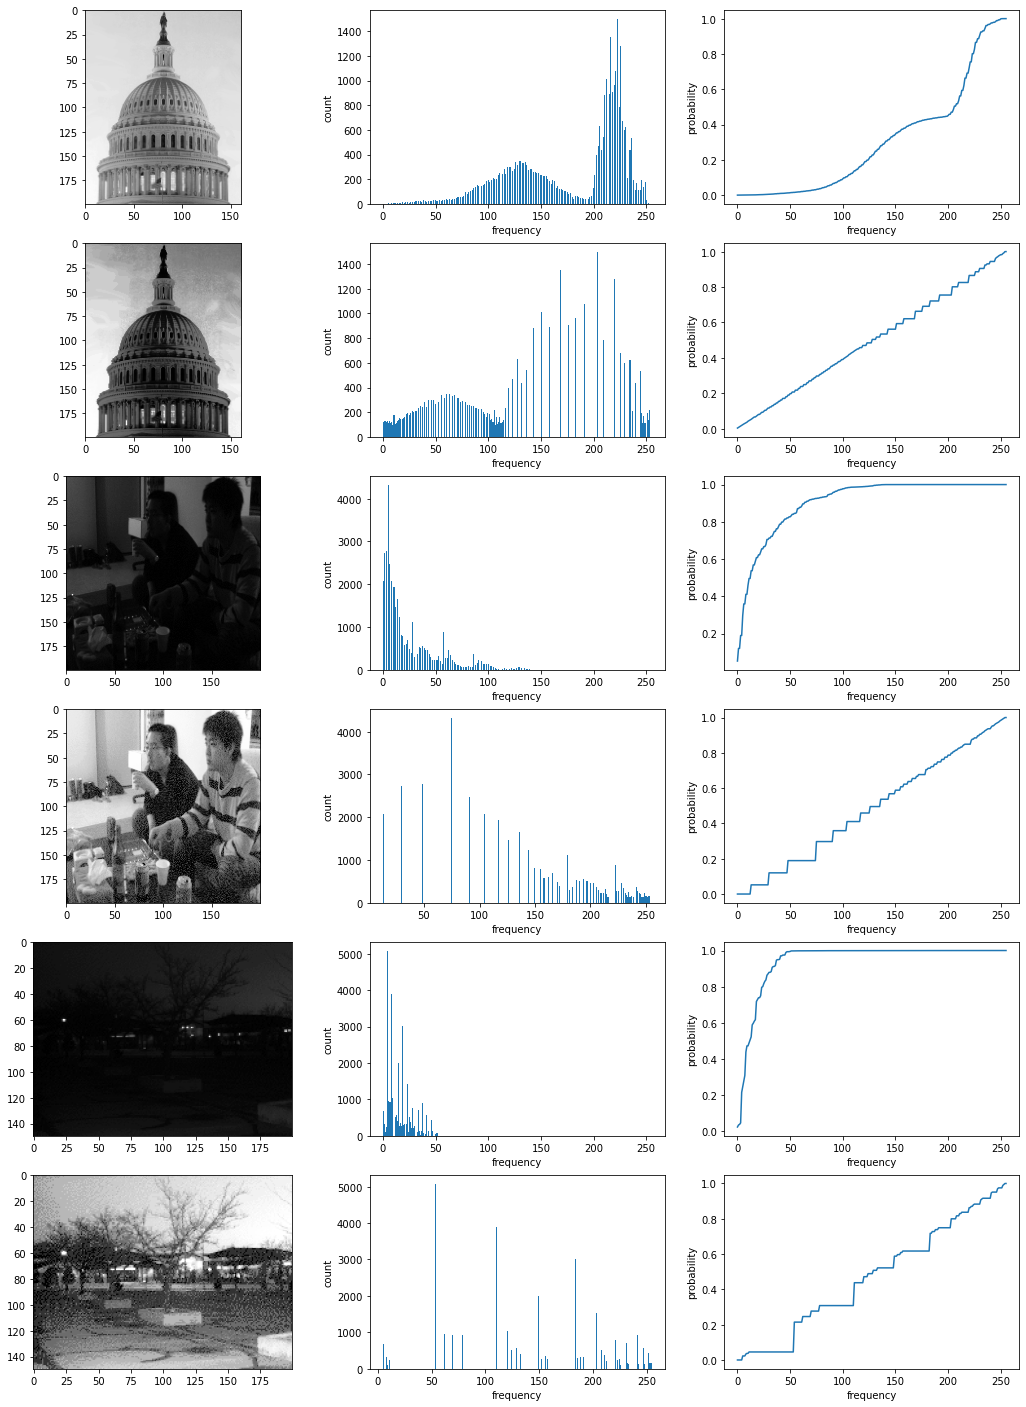

In [18]:
image_paths = ['a1_a.png', 'a1_b.png', 'a1_c.png'] # all images provided
# image_paths = ['a1_a.png']

fig = plt.figure(figsize=(18,25))

for i, image_path in enumerate(image_paths):
    
    im_in = get_image(image_path)
    
    plt.subplot(6, 3, (i * 6) + 1)
    plt.imshow(im_in, cmap='gray')
    
    plt.subplot(6, 3, (i * 6) + 2)
    plt.hist(im_in.ravel(), bins=256)
    plt.xlabel('frequency')
    plt.ylabel('count')
    
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)
    plt.subplot(6, 3, (i * 6) + 3)
    plt.plot(cdf)
    plt.xlabel('frequency')
    plt.ylabel('probability')
    
    res = histogram_equalization(im_in)
    
    plt.subplot(6, 3, (i * 6) + 4)
    plt.imshow(res, cmap='gray')
    
    plt.subplot(6, 3, (i * 6) + 5)
    plt.hist(res.ravel(), bins=256)
    plt.xlabel('frequency')
    plt.ylabel('count')

    pdf = create_pdf(res)
    cdf = create_cdf(pdf)
    plt.subplot(6, 3, (i * 6) + 6)
    plt.plot(cdf)
    plt.xlabel('frequency')
    plt.ylabel('probability')
    
fig.savefig('figure.png', dpi=100)

#### Reapplying Histogram Equalization

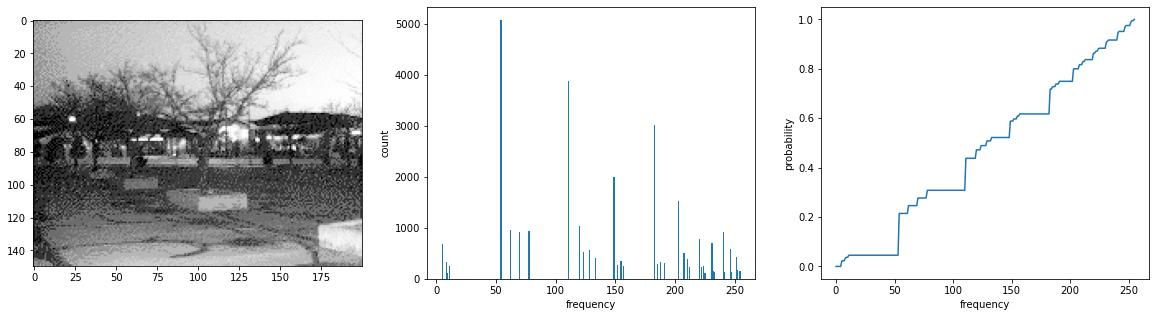

In [19]:
res2 = histogram_equalization(res)
fig = fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.imshow(res2, cmap='gray')

plt.subplot(1, 3, 2)
plt.hist(res2.ravel(), bins=256)
plt.xlabel('frequency')
plt.ylabel('count')

pdf = create_pdf(res2)
cdf = create_cdf(pdf)
plt.subplot(1, 3, 3)
plt.plot(cdf)
plt.xlabel('frequency')
plt.ylabel('probability')
plt.show()

fig.savefig('figure2.png', dpi=100)

#### Histogram Equalization On Non-provided Image

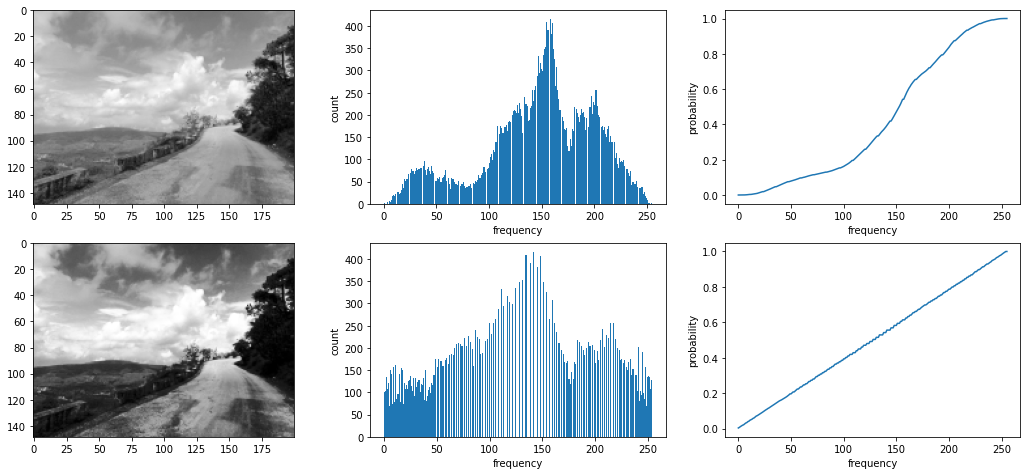

In [21]:
fig = plt.figure(figsize=(18,25))

im_in = get_image('gg.png')
    
plt.subplot(6, 3, (i * 6) + 1)
plt.imshow(im_in, cmap='gray')

plt.subplot(6, 3, (i * 6) + 2)
plt.hist(im_in.ravel(), bins=256)
plt.xlabel('frequency')
plt.ylabel('count')

pdf = create_pdf(im_in)
cdf = create_cdf(pdf)
plt.subplot(6, 3, (i * 6) + 3)
plt.plot(cdf)
plt.xlabel('frequency')
plt.ylabel('probability')

res = histogram_equalization(im_in)

plt.subplot(6, 3, (i * 6) + 4)
plt.imshow(res, cmap='gray')

plt.subplot(6, 3, (i * 6) + 5)
plt.hist(res.ravel(), bins=256)
plt.xlabel('frequency')
plt.ylabel('count')

pdf = create_pdf(res)
cdf = create_cdf(pdf)
plt.subplot(6, 3, (i * 6) + 6)
plt.plot(cdf)
plt.xlabel('frequency')
plt.ylabel('probability')

plt.show()

## Appendix A2

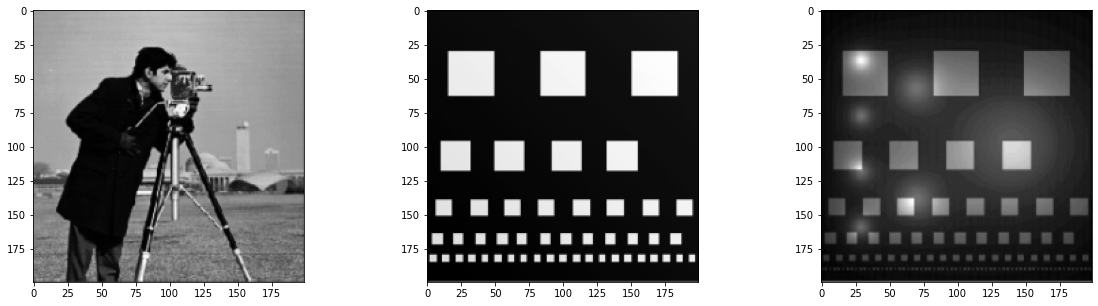

In [22]:
image_paths = ['a2_a.png', 'a2_b.png', 'a2_c.png']

fig = fig = plt.figure(figsize=(20,5))

for i, image_path in enumerate(image_paths):
    im_in = get_image(image_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(im_in, cmap='gray')

fig.savefig('p21.png', dpi=100)

#### Manual Threshold

In [23]:
def manual_threshold(im_in, threshold):
    manual_thresh_img = np.zeros(len(im_in.ravel()))
    
    for i, freq in enumerate(im_in.ravel()):
        if freq < threshold:
            manual_thresh_img[i] = 0
        else:
            manual_thresh_img[i] = 255
    
    manual_thresh_img = np.reshape(manual_thresh_img, im_in.shape)
    
    return manual_thresh_img

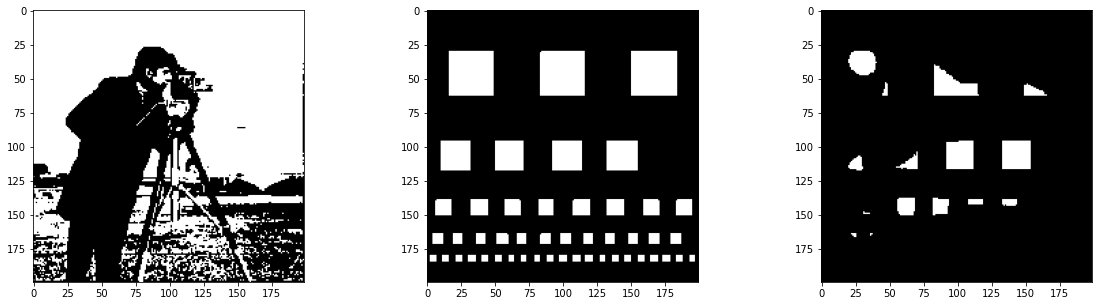

In [24]:
fig = fig = plt.figure(figsize=(20,5))

threshold = 127

for i, image_path in enumerate(image_paths):
    im_in = get_image(image_path)
    res = manual_threshold(im_in, threshold)
    plt.subplot(1, 3, i + 1)
    plt.imshow(res, cmap='gray')

fig.savefig('p22.png', dpi=100)

#### Otsu Thresholding

In [26]:
def otsu_threshold(im_in):
    thresholds = np.arange(1, 255) # exclude max and min values
    sigma = np.zeros(len(thresholds))
    
    for i, t in enumerate(thresholds):
        left_dist = im_in.ravel()[np.where(im_in.ravel() < t)]
        right_dist = im_in.ravel()[np.where(im_in.ravel() >= t)]
        
        left_std = np.std(left_dist)
        right_std = np.std(right_dist)
        
        pdf = create_pdf(im_in.ravel())
        
        
        left_sum = np.sum(pdf[:t])
        right_sum = np.sum(pdf[t:])
        
        sigma[i] = left_sum * left_std + right_sum * right_std
        
    optimal_t = np.argmin(sigma)
    otsu_thresh_img = manual_threshold(im_in, optimal_t)
    
    return otsu_thresh_img, sigma

Optimal Threshold:  79
Optimal Threshold:  89
Optimal Threshold:  61


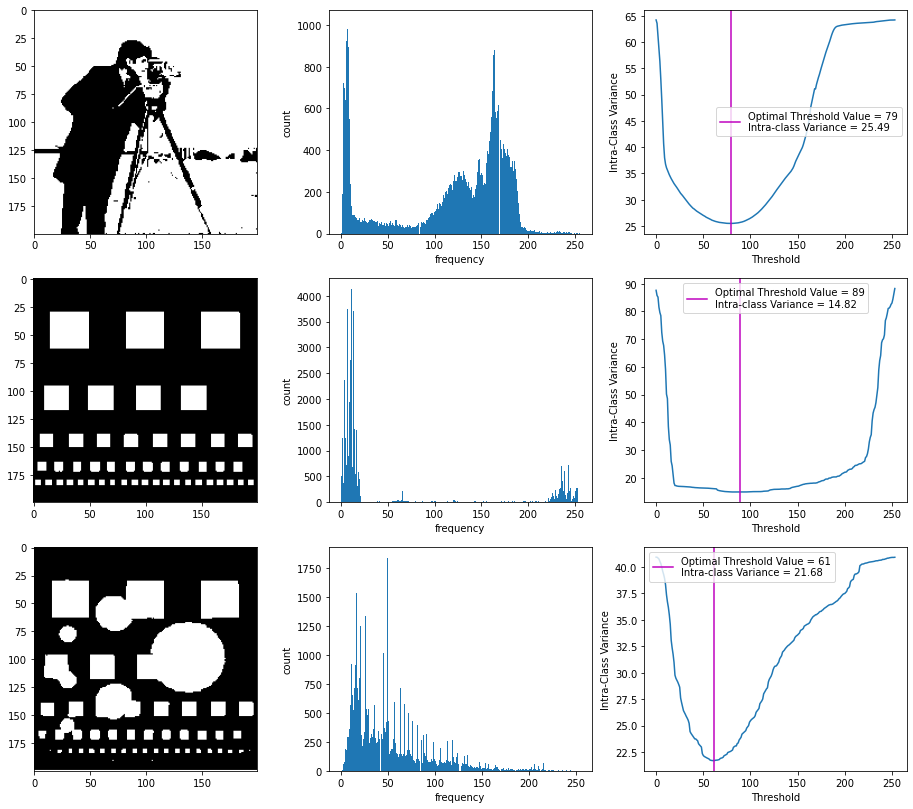

In [37]:
fig = fig = plt.figure(figsize=(16,14))

image_paths = ['a2_a.png', 'a2_b.png', 'a2_c.png']

for i, image_path in enumerate(image_paths):
    im_in = get_image(image_path)
    res, sigma = otsu_threshold(im_in)
    
    optimal_t = np.argmin(sigma)
    print('Optimal Threshold: ', optimal_t)
    
    plt.subplot(3, 3, i*3 + 1)
    plt.imshow(res, cmap='gray')
    
    plt.subplot(3, 3, i*3 + 2)
    plt.hist(im_in.ravel(), bins=256)
    plt.xlabel('frequency')
    plt.ylabel('count')
    
    plt.subplot(3, 3, i*3 + 3)
    plt.plot(sigma)
    plt.axvline(x=optimal_t,
                color='m',
                label='Optimal Threshold Value = ' + str(optimal_t) 
                        + '\nIntra-class Variance = ' + str(round(np.min(sigma), 2)))
    
    plt.xlabel('Threshold')
    plt.ylabel('Intra-Class Variance')
    plt.legend()

fig.savefig('p23.png', dpi=100)